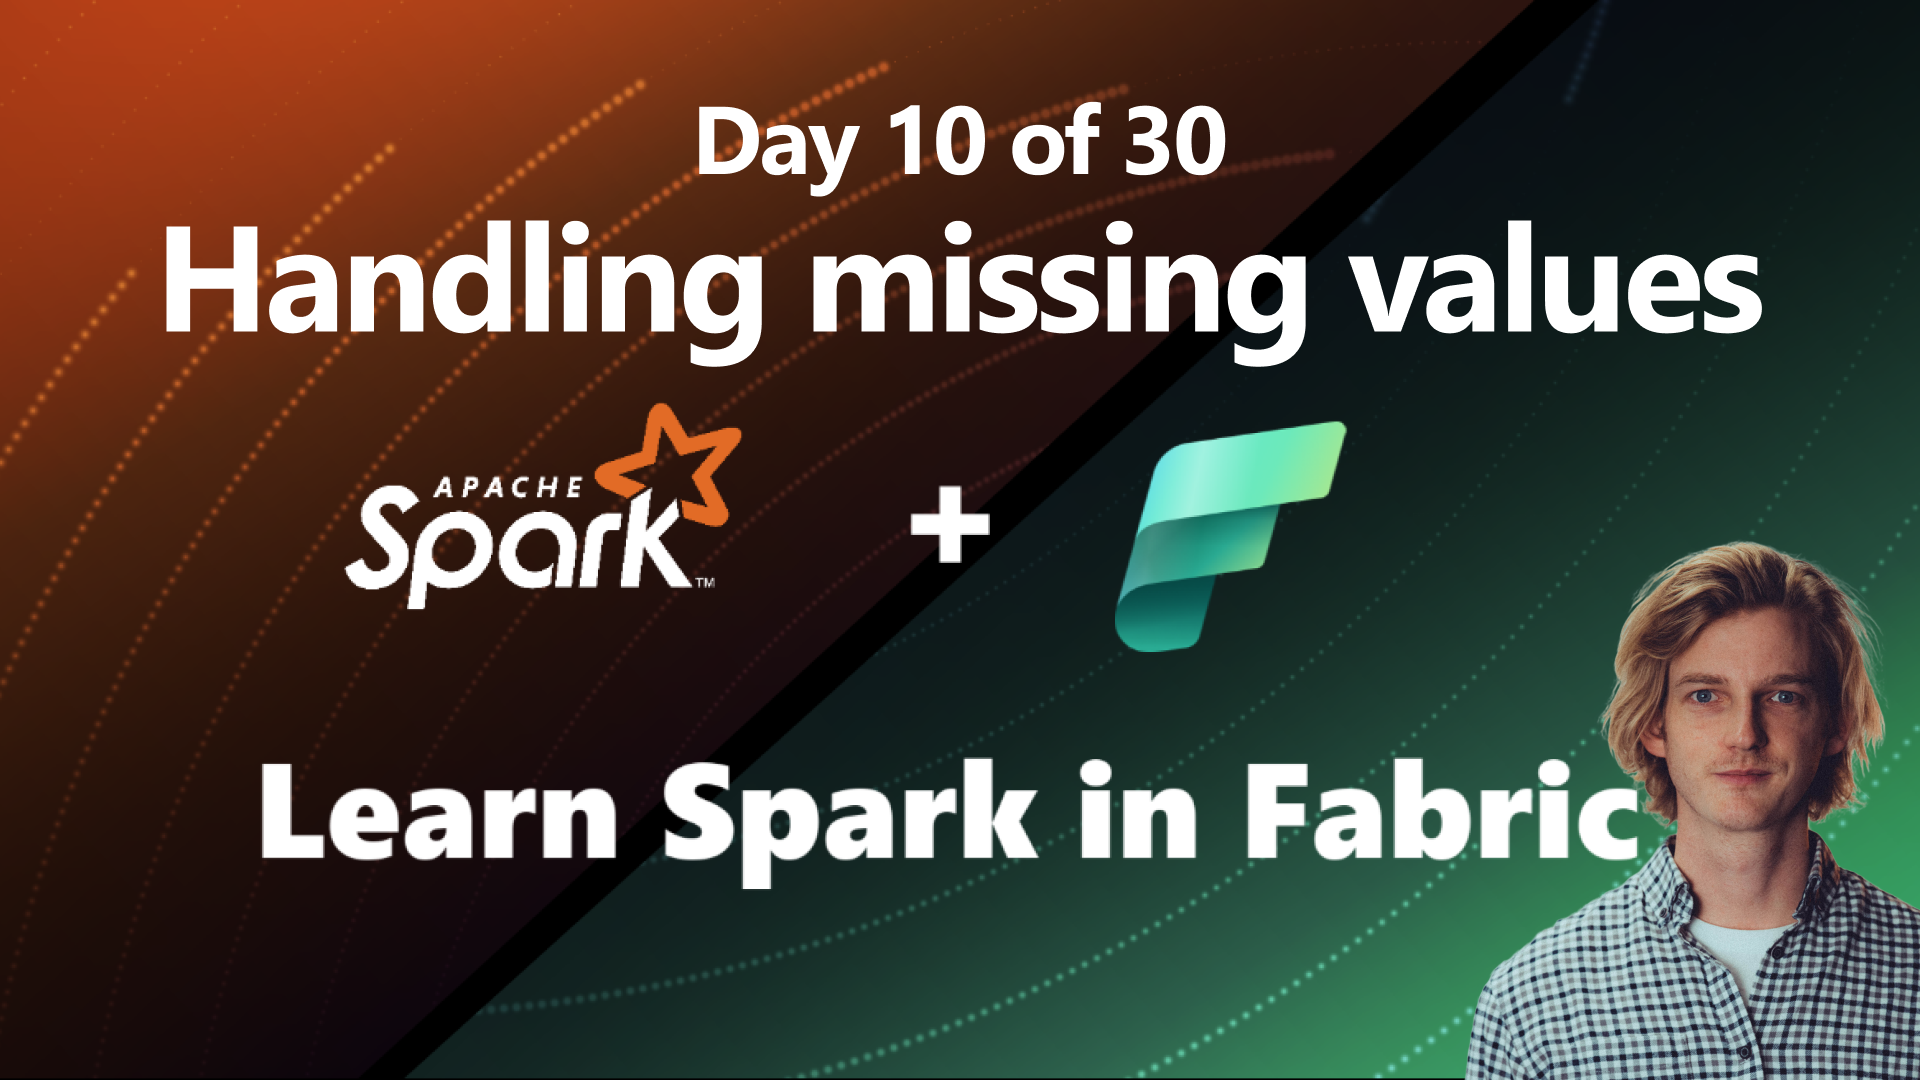

#### Why? 

Dealing with missing values is a common data processing task in preparation for machine learning. 

Most machine learning algorithms don't like it when you have missing values. 

So there are a variety of methods we can use to deal with this. 

Which one you choose depends greatly on: 
- the business question you are answering, 
- what 'makes sense' for your domain. 

#### Let's get some data 

In [ ]:
df = spark.read.csv('Files/property-sales-missing.csv', header=True, inferSchema=True)
df.show()

#### Dropping rows with nulls

In [ ]:
#most basic/drastic drop NAs 
df.na.drop().show()

#### How='any' vs how='all'

In [ ]:
#drop the row if ANY values are null  
df.na.drop(how='any').show()


#drop the row if ALL values are null  
df.na.drop(how='all').show()

#### Dropping with a threshold 

In [ ]:
df.na.drop(thresh=3).show()

#### Only drop if NULL in certain columns (subset)

In [ ]:
df.na.drop(subset=["SalePrice_USD","Address"]).show()

#### Filling missing values

In [ ]:
#two methods, same result
# note: the columns in the subset must be the same data type as the value, otherwise it will be ignored. 
df.na.fill(value='Unknown Address',subset=["Address"]).show()

df.fillna(value='Unknown Address',subset=["Address"]).show()

In [ ]:
#also works for numbers 

df.na.fill(value=0,subset=["SalePrice_USD", "Address"]).show()

#### Mean Imputation

In [ ]:
from pyspark.ml.feature import Imputer

# Initialize the Imputer
imputer = Imputer(
    inputCols= ['SalePrice_USD'], #specifying the input column names
    outputCols=['SalesPriceImputed_USD'], #specifying the output column names
    strategy="mean"                  # or "median" if you want to use the median value
)

# Fit the Imputer
model = imputer.fit(df)

#Transform the dataset
imputed_df = model.transform(df)

imputed_df.show()

---
#### Your final tasks: 

✅ View this notebook and all others in this series on GitHub. 

✅ Leave a comment below

✅ Subscribe 

✅ Like